### Optativa: Optimización en la Industria
### UNSL - 2020
# Práctico 5:
## Aplicación de GA y DE a problemas de optimización (1ra Parte)

_________________________

$\mathbf{Ejercicio} \,\,1$: 

El problema de Strip Packing (Empaquetado en Tiras) es un problema de minimización en una geometría bi-dimensional. Más específicamente, dado un conjunto de rectángulos alineados por sus respectivas coordenadas y un "strip" (una tira de material que puede ser finita o infinita). La tira podría ser un rollo de tela o una plancha de vidrio o madera y los rectángulos las piezas que necesitemos cortar. El objetivo es encontrar un empaquetado o distribución de los rectángulos no superpuestos de manera tal que se minimice el material de desecho (o no usado). Esto sería equivalente a minimizar la altura máxima ocupada por los rectángulos dentro del strip.

Hay muchas versiones del problema, en nuestro caso y a los efectos de mantener las cosas simples, los rectángulos NO se pueden rotar y cuando se van poniendo en la secuencia, el strip se "corta" (tipo guillotina) a la altura del rectángulo más alto y desde allí se comienza a ordenar el resto de los rectángulos.

En el próximo ejemplo tenemos un strip (que puede ser finito, como una plancha de madera o vidrio) y seis rectángulos a distribuir. En la figura aparecen 2 soluciones, la primera distribuye los rectángulos en el siguiente orden: 1,2,3,4,5 y 6 (izquierda) y la otra, 1,2,4,3,5 y 6 (derecha). Claramente la segunda solución es mejor que la primera ya que usa menos material (menor altura del empaquetamiento). Respecto al corte guillotina, vemos en la primera solución que una vez que se pusieron los rectángulos 1 y 2, debe ir el 3, pero ya no hay lugar para el mismo luego del rectángulo 2. Por ello, se cortó a la altura del rectángulo 1 y desde allí se comenzó a acomodar (empaquetar) con el rectángulo 3, se sigue con el 4 y 5. Pero el 6 ya deber ser puesto más arriba luego del corte guillotina a la altura del 3.
 

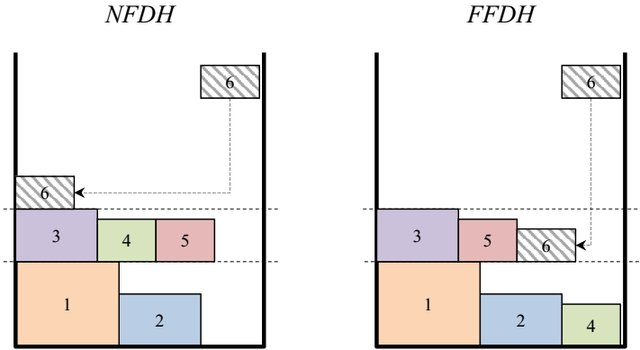

In [23]:
from IPython.display import Image
Image(filename='Ejemplo1-StripPack.jpg', width=500, height=500)   #la figura se encuentra en la carpeta de prácticos

Este otro ejemplo, muestra una instancia del problema de strip packing (parte superior), según nuestra definición la cual está compuesta de 7 rectángulos con sus respectivos ancho ($w(i)$) y alto ($h(i)$). El valor $W$ corresponde al ancho del strip y se debe cunplir que $w(i) \leq W$ para todo $i$, esto es, el ancho de cada rectánfgulo no puede ser mayor al ancho del strip. Luego se muestran dos posibles soluciones para dicha instancia del problema, siendo la última (1,2,3,5,4,6,7) la mejor de las dos con una altura total de 12. Es decir, se produce un menor desperdicio.

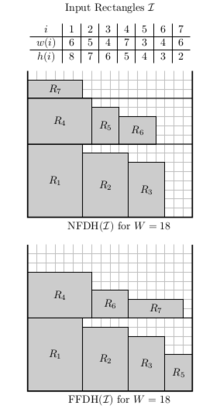

In [24]:
Image(filename='Ejemplo2-StripPack.png') #la figura se encuentra en la carpeta de prácticos

Se pide implementar un Algoritmo Genético (AG) en Python para resolver este problema. 

Como sugerencia, usar permutaciones de enteros para la representación de las soluciones (cromosomas) y para los operadores genéticos, considerar el operador de crossover llamado PMX (Partial-Mapped Crossover) y un operador de mutación simple que realice un intercambio entre dos posiciones elegidas aleatoriamente. Buscar el PMX en la literatura para su explicación.

Para la prueba del AG considerar 2 instancias de 10 y 20 rectángulos, un ancho del strip de $W=100$ para las 2 instancias y los valores $w(i)$ y $h(i)$ para $i=1, \dots, 10$ o  $i=1, \dots, 20$, deben ser generados aleatoriamente en el rango el intervalo entero $[10,50]$.  Esto significa que $10 \leq w(i) \leq  50$, lo que asegura que ninguno de los rectángulos tendrá un ancho mayor a $W=100$. En cuanto a la altura,  podemos fijar los siguientes valores $10 \leq h(i) \leq  75$, aquí no hay problemas con la altura (es como tener un strip sin límites), sólo se considera un valor arbitrario de $75$.

Mostrar las mejores soluciones encontradas para las dos instancias considerando variar el número máximo de generaciones, de 5000 y 1000. El resto de los parámetros del AG son fijos ($p_c=0.65$, $p_m=0.1$, tamaño de población $50$).

++++++++++++++++++++++++

$\mathbf{Respuesta}$


In [5]:
import numpy as np

np.random.seed(0)

W = 100
Pc = 0.65
Pm = 0.1
Np = 50

# Genero la población como permutaciones de n elementos
def generar_poblacion(n):
    poblacion = np.zeros((Np, n))
    for i in range(Np):
        individuo = np.random.permutation(n)
        poblacion[i] = individuo
    return poblacion


# Función de fitness que devuelve la altura total de una distribución de rectángulos
def f(e):
    ancho_acum = 0
    altura_actual = 0
    altura_total = 0

    for i in e:
        i = int(i)
        if anchos[i] + ancho_acum <= W:
            ancho_acum += anchos[i]
            if alturas[i] > altura_actual:
                altura_actual = alturas[i]
        else:
            altura_total += altura_actual
            ancho_acum = anchos[i]
            altura_actual = alturas[i]

    altura_total += altura_actual
    return altura_total


# Selecciona dos individuos al azar y elige el mejor
def seleccionar_padre(poblacion):
    indice_padre1 = np.random.randint(0, Np - 1)
    indice_padre2 = np.random.randint(0, Np - 1)
    while indice_padre1 == indice_padre2:
        indice_padre2 = np.random.randint(0, Np - 1)
    # Selecciono dos padres al azar
    padre1 = poblacion[indice_padre1]
    padre2 = poblacion[indice_padre2]
    # Elijo al padre con la menor función de fitness
    if f(padre1) <= f(padre2):
        return padre1
    else:
        return padre2

    
# Operador de crossover PMX
def pmx(padre1, padre2, n):
    hijo = np.zeros(n)
    punto1 = np.random.randint(1, n - 1)
    punto2 = np.random.randint(1, n - 1)
    while (punto1 == punto2):
        punto2 = np.random.randint(1, n - 1)
    # Acomodo los índices si están cruzados
    if punto1 > punto2:
        aux = punto2
        punto2 = punto1
        punto1 = aux
    # Reparto los segmentos
    hijo[:punto1] = padre1[:punto1]
    hijo[punto1:punto2] = padre2[punto1:punto2]
    hijo[punto2:] = padre1[punto2:]
    # Busco aquellos valores que no fueron copiados
    for i in range(punto1, punto2):
        if not (padre1[i] in padre2[punto1:punto2]):
            index = indice(padre1, padre2[i])
            while punto1 <= index < punto2:
                index = indice(padre1, hijo[index])
            hijo[index] = padre1[i]
    return hijo


# Mutación mediante intercambio de dos genes al azar
def mutacion(individuo):
    index1 = np.random.randint(0, n)
    index2 = np.random.randint(0, n)
    while index1 == index2:
        index2 = np.random.randint(0, n)
    aux = individuo[index1]
    individuo[index1] = individuo[index2]
    individuo[index2] = aux

    return individuo


# Retorna el mejor individuo de su población
def mejor_individuo(poblacion):
    resultado = poblacion[0]
    valor = f(poblacion[0])

    for i in range(1, Np):
        nuevo_valor = f(poblacion[i])
        if nuevo_valor < valor:
            valor = nuevo_valor
            resultado = poblacion[i]

    return np.copy(resultado)


# Dado un individuo y un valor me devuelve la posición en la cual se encuentra
def indice(individuo, valor):
    for i in range(len(individuo)):
        if individuo[i] == valor:
            return i


# Algoritmo principal
def ga(n, gen):
    poblacion = generar_poblacion(n)
    nueva_poblacion = np.zeros((Np, n))

    print("Ancho de los rectángulos: ", end='')
    print(anchos)
    print("Altura de los rectángulos: ", end='')
    print(alturas)
    print("-----------------------------------------")
    resultado = poblacion[0]
    print("Primer mejor resultado: ", end='')
    print(resultado)
    print("La altura total es: ", end='')
    print(f(resultado))
    print("-----------------------------------------")

    for i in range(gen):
        for j in range(Np):
            # Realizo crossover
            if np.random.random() <= Pc:
                padre1 = seleccionar_padre(poblacion)
                padre2 = seleccionar_padre(poblacion)
                hijo = pmx(padre1, padre2, n)
            else:
                hijo = poblacion[j]
                
            # Realizo mutacion
            if np.random.random() <= Pm:
                hijo = mutacion(hijo)
            # Agrego a la nueva población
            nueva_poblacion[j] = hijo

        poblacion = nueva_poblacion
        mejor_actual = mejor_individuo(poblacion)
        if f(mejor_actual) < f(resultado):
            resultado = np.copy(mejor_actual)

    print("El orden de rectángulos es: ", end='')
    print(resultado)
    print("La altura total es: ", end='')
    print(f(resultado))


n = 20
anchos = np.random.randint(10, 50, n)
alturas = np.random.randint(10, 75, n)

ga(n, 10000)

Ancho de los rectángulos: [10 13 13 49 19 29 31 46 33 16 34 34 22 11 48 49 33 34 27 47]
Altura de los rectángulos: [35 19 30 57 74 59 39 29 29 24 49 42 19 67 42 41 33 45 65 38]
-----------------------------------------
Primer mejor resultado: [17.  9. 19.  3. 14. 13.  7. 10. 12. 11.  1. 16.  8.  6. 15.  5.  4. 18.
  0.  2.]
La altura total es: 389
-----------------------------------------
El orden de rectángulos es: [13. 18.  4.  5.  0. 14. 15.  9.  7.  8.  3.  2. 10. 19. 16. 17.  6. 11.
 12.  1.]
La altura total es: 304


$\mathbf{Resultados}$

Para $n = 10$:
  - Con $5000$ generaciones:
      - Individuo: [6, 7, 8, 0, 1, 2, 9, 5, 4, 3]
      - Valor: 160
  - Con $10000$ generaciones: 
      - Individuo: [6, 7, 8, 0, 1, 2, 9, 5, 4, 3]
      - Valor: 160
      
      
Para $n = 20$
  - Con $5000$ generaciones:
      - Individuo: [13, 18, 4, 5, 0, 14, 15, 9, 7, 8, 3, 2, 10, 19, 16, 17, 6, 11, 12, 1]
      - Valor: 304
  - Con $10000$ generaciones: 
      - Individuo: [13, 18, 4, 5, 0, 14, 15, 9, 7, 8, 3, 2, 10, 19, 16, 17, 6, 11, 12, 1]
      - Valor: 304